# Neural Network Regression: Predicting Creative Ideas

This notebook demonstrates how to use a neural network to predict the number of creative ideas based on factors like shower time, sleep quality, and stress level.

## What is Neural Network Regression?

Neural network regression is a type of supervised machine learning where we use a neural network to predict continuous values (rather than categories). In this case, we want to predict the number of creative ideas a person might generate based on various factors.

Unlike linear regression, neural networks can capture complex non-linear relationships between features and the target variable.


## 1. Loading and Exploring the Dataset

Let's start by loading our dataset of creative ideas and exploring it.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Set plot styling


plt.style.use("seaborn-v0_8-whitegrid")


sns.set_palette("viridis")


# Load the dataset


df = pd.read_csv("creative_ideas_dataset.csv")


# Display the first few rows


print("Dataset shape:", df.shape)


df.head()

Dataset shape: (30, 5)


,Minutes_in_Shower,Time_of_Day,Sleep_Quality,Stress_Level,Creative_Ideas_Generated
0,17,Afternoon,10,7,12
1,19,Evening,8,4,12
2,14,Evening,5,7,8
3,13,Morning,9,8,12
4,17,Evening,6,7,11


In [16]:
# Get basic statistics about the dataset
df.describe()

,Minutes_in_Shower,Sleep_Quality,Stress_Level,Creative_Ideas_Generated
count,30.000000,30.000000,30.000000,30.000000
mean,13.100000,7.966667,5.600000,10.833333
std,4.611455,1.847334,2.685851,1.599210
min,6.000000,5.000000,1.000000,7.000000
25%,10.250000,6.250000,4.000000,10.000000
50%,12.500000,8.000000,6.000000,12.000000
75%,17.000000,10.000000,8.000000,12.000000
max,20.000000,10.000000,9.000000,12.000000


## 2. Data Visualization

Let's visualize the relationships between our features and the target variable (Creative Ideas Generated).


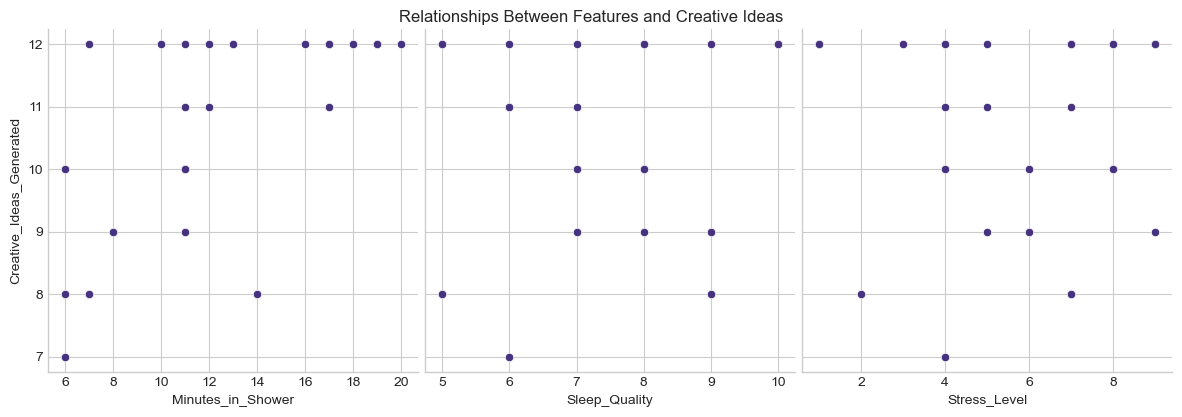

In [17]:
# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(
    df,
    x_vars=["Minutes_in_Shower", "Sleep_Quality", "Stress_Level"],
    y_vars=["Creative_Ideas_Generated"],
    height=4,
    aspect=1,
)
plt.suptitle("Relationships Between Features and Creative Ideas", y=1.02)
plt.show()

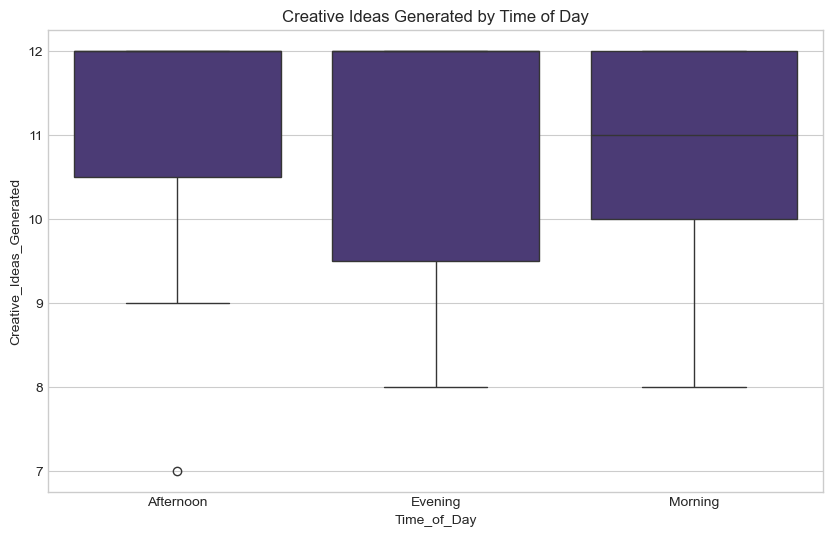

In [18]:
# Visualize the effect of Time of Day on creative ideas
plt.figure(figsize=(10, 6))
sns.boxplot(x="Time_of_Day", y="Creative_Ideas_Generated", data=df)
plt.title("Creative Ideas Generated by Time of Day")
plt.show()

## 3. Data Preparation for Neural Network

Before we can feed our data into a neural network, we need to prepare it:

1. Split features (X) and target (y)
2. Convert categorical variables to numerical using one-hot encoding
3. Normalize or standardize numerical features
4. Split data into training and testing sets


In [19]:
# Split features and target
X = df.drop("Creative_Ideas_Generated", axis=1)
y = df["Creative_Ideas_Generated"]

# Identify categorical and numerical columns
categorical_cols = ["Time_of_Day"]
numerical_cols = ["Minutes_in_Shower", "Sleep_Quality", "Stress_Level"]

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ]
)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
ohe = preprocessor.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(cat_feature_names)

print(f"Training data shape after preprocessing: {X_train_processed.shape}")
print(f"Feature names: {all_feature_names}")

Training data shape after preprocessing: (24, 5)
Feature names: ['Minutes_in_Shower', 'Sleep_Quality', 'Stress_Level', 'Time_of_Day_Evening', 'Time_of_Day_Morning']


## 4. Building the Neural Network Model

Now let's build a simple neural network for regression. We'll use:

- Multiple dense (fully connected) layers
- ReLU activation functions for hidden layers
- Mean Squared Error (MSE) as the loss function
- Adam optimizer


In [20]:
# Function to create a simple neural network
def create_model(input_dim):
    model = Sequential(
        [
            Dense(16, activation="relu", input_dim=input_dim),
            Dropout(0.2),  # Add dropout to prevent overfitting
            Dense(8, activation="relu"),
            Dense(1),  # No activation for regression output
        ]
    )

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss="mse",  # Mean Squared Error
        metrics=["mae"],  # Mean Absolute Error
    )

    return model


# Create the model
input_dim = X_train_processed.shape[1]
model = create_model(input_dim)

# Display the model summary
model.summary()

c:\Users\super\miniconda3\envs\pyt12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Could not generate model diagram. Installing graphviz might resolve this.


C:\Users\super\AppData\Local\Temp\ipykernel_57488\3954158894.py:107: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\super\miniconda3\envs\pyt12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


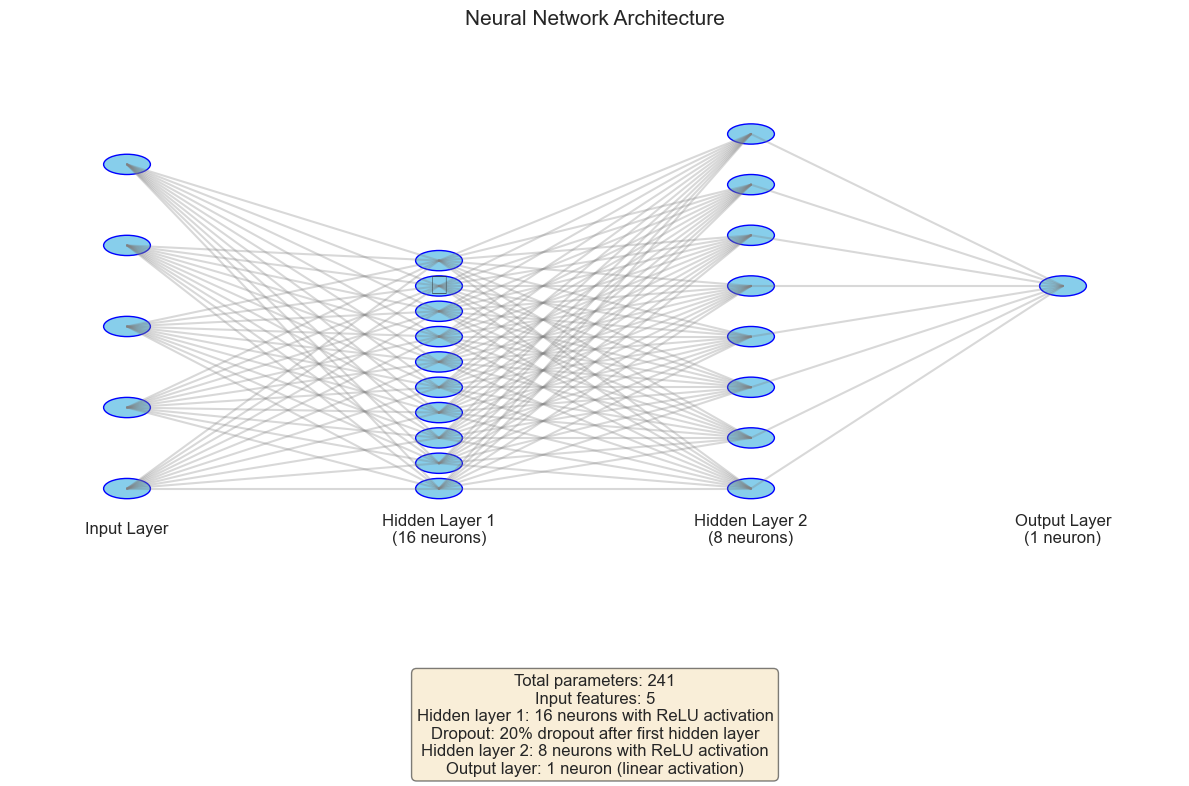

In [21]:
# Visualize the neural network architecture
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Plot the model architecture diagram
try:
    plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)
    img = plt.imread("model_architecture.png")
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Neural Network Architecture")
    plt.show()
except:
    # Fallback if plot_model doesn't work (needs graphviz installed)
    print("Could not generate model diagram. Installing graphviz might resolve this.")

# Visualize the neural network structure with nodes
layer_sizes = [input_dim, 16, 8, 1]
layer_names = [
    "Input Layer",
    "Hidden Layer 1\n(16 neurons)",
    "Hidden Layer 2\n(8 neurons)",
    "Output Layer\n(1 neuron)",
]

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.title("Neural Network Architecture", fontsize=15)

# Draw nodes
left = 0.1
right = 0.9
layer_spacing = (right - left) / (len(layer_sizes) - 1)
max_nodes = max(layer_sizes)

for i, (layer_size, name) in enumerate(zip(layer_sizes, layer_names)):
    x = left + i * layer_spacing

    # Draw nodes in the layer
    for j in range(layer_size):
        if j >= 10 and layer_size > 10:  # Limit to displaying max 10 nodes with ellipsis
            if j == 10:
                plt.text(x, 0.5, "⋮", fontsize=20, ha="center", va="center")
            continue

        # Calculate y-position to center nodes
        spacing = 0.8 / max(layer_size, 1)
        if layer_size == 1:
            y = 0.5
        else:
            y = 0.1 + j * spacing

        circle = plt.Circle((x, y), 0.02, fill=True, color="skyblue", ec="blue")
        ax.add_patch(circle)

    # Add layer name
    plt.text(x, 0.02, name, ha="center", va="center", fontsize=12)

# Draw connections between layers
if True:  # Set to False to hide connections (can be messy with many nodes)
    for i in range(len(layer_sizes) - 1):
        layer_left_x = left + i * layer_spacing
        layer_right_x = left + (i + 1) * layer_spacing

        # Draw connection lines (limited to avoid clutter)
        for j in range(min(layer_sizes[i], 10)):
            for k in range(min(layer_sizes[i + 1], 10)):
                spacing_left = 0.8 / max(layer_sizes[i], 1)
                spacing_right = 0.8 / max(layer_sizes[i + 1], 1)

                y_left = 0.1 + j * spacing_left if layer_sizes[i] > 1 else 0.5
                y_right = 0.1 + k * spacing_right if layer_sizes[i + 1] > 1 else 0.5

                line = plt.Line2D(
                    [layer_left_x, layer_right_x], [y_left, y_right], color="gray", alpha=0.3
                )
                ax.add_line(line)

# Show specific information about the model
textstr = (
    f"Total parameters: {model.count_params()}\n"
    f"Input features: {input_dim}\n"
    f"Hidden layer 1: 16 neurons with ReLU activation\n"
    f"Dropout: 20% dropout after first hidden layer\n"
    f"Hidden layer 2: 8 neurons with ReLU activation\n"
    f"Output layer: 1 neuron (linear activation)"
)

props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
ax.text(
    0.5,
    -0.1,
    textstr,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="center",
    bbox=props,
)

plt.xlim(0, 1)
plt.ylim(-0.15, 1)
plt.axis("off")
plt.tight_layout()
plt.show()

### Understanding the Neural Network Architecture:

1. **Input Layer**: Takes in our processed features (shower time, sleep quality, stress level, and time of day)
2. **Hidden Layers**: Two dense layers with ReLU activation functions that learn complex patterns
3. **Dropout Layer**: Helps prevent overfitting by randomly turning off neurons during training
4. **Output Layer**: A single neuron that outputs the predicted number of creative ideas


## 5. Training the Neural Network


In [ ]:
# Train the model
history = model.fit(
    X_train_processed,
    y_train,
    epochs=100,
    batch_size=4,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1,
)

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Model Mean Absolute Error")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

## 6. Evaluating the Model

Now let's evaluate our model on the test data to see how well it generalizes to new, unseen data.


In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test_processed).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--")
plt.xlabel("Actual Creative Ideas")
plt.ylabel("Predicted Creative Ideas")
plt.title("Neural Network Regression: Predicted vs Actual Creative Ideas")
plt.grid(True)
plt.show()

## 7. Making Predictions with the Model

Let's use our trained model to make some predictions on new data points.


In [ ]:
# Function to make predictions on new data
def predict_creative_ideas(shower_time, time_of_day, sleep_quality, stress_level):
    # Create a DataFrame with the new data
    new_data = pd.DataFrame(
        {
            "Minutes_in_Shower": [shower_time],
            "Time_of_Day": [time_of_day],
            "Sleep_Quality": [sleep_quality],
            "Stress_Level": [stress_level],
        }
    )

    # Preprocess the new data
    new_data_processed = preprocessor.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_processed).flatten()[0]

    return max(0, round(prediction))  # Ensure non-negative integer


# Example predictions
scenarios = [
    {"shower_time": 15, "time_of_day": "Morning", "sleep_quality": 9, "stress_level": 3},
    {"shower_time": 5, "time_of_day": "Evening", "sleep_quality": 5, "stress_level": 8},
    {"shower_time": 10, "time_of_day": "Afternoon", "sleep_quality": 7, "stress_level": 5},
]

for i, scenario in enumerate(scenarios, 1):
    prediction = predict_creative_ideas(
        scenario["shower_time"],
        scenario["time_of_day"],
        scenario["sleep_quality"],
        scenario["stress_level"],
    )

    print(f"Scenario {i}:")
    print(f"  - Shower time: {scenario['shower_time']} minutes")
    print(f"  - Time of day: {scenario['time_of_day']}")
    print(f"  - Sleep quality: {scenario['sleep_quality']}/10")
    print(f"  - Stress level: {scenario['stress_level']}/10")
    print(f"  → Predicted creative ideas: {prediction}\n")

## 8. Feature Importance Analysis

While neural networks don't give direct feature importance like some other models, we can examine feature importance by measuring how much the predictions change when we vary each feature.


In [ ]:
# Create a baseline data point (average values)
baseline = pd.DataFrame(
    {
        "Minutes_in_Shower": [df["Minutes_in_Shower"].mean()],
        "Time_of_Day": ["Morning"],  # Using Morning as baseline
        "Sleep_Quality": [df["Sleep_Quality"].mean()],
        "Stress_Level": [df["Stress_Level"].mean()],
    }
)

baseline_processed = preprocessor.transform(baseline)
baseline_prediction = model.predict(baseline_processed).flatten()[0]


# Function to measure feature impact
def measure_feature_impact(feature_name, baseline, steps=10):
    impacts = []
    values = []

    if feature_name == "Time_of_Day":
        for time in ["Morning", "Afternoon", "Evening"]:
            test_point = baseline.copy()
            test_point["Time_of_Day"] = [time]
            test_processed = preprocessor.transform(test_point)
            prediction = model.predict(test_processed).flatten()[0]
            impact = prediction - baseline_prediction
            impacts.append(impact)
            values.append(time)
    else:
        feature_min = df[feature_name].min()
        feature_max = df[feature_name].max()
        step_size = (feature_max - feature_min) / steps

        for i in range(steps + 1):
            value = feature_min + i * step_size
            test_point = baseline.copy()
            test_point[feature_name] = [value]
            test_processed = preprocessor.transform(test_point)
            prediction = model.predict(test_processed).flatten()[0]
            impact = prediction - baseline_prediction
            impacts.append(impact)
            values.append(value)

    return values, impacts


# Measure impact for each feature
features = ["Minutes_in_Shower", "Sleep_Quality", "Stress_Level", "Time_of_Day"]
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    values, impacts = measure_feature_impact(feature, baseline)

    if feature == "Time_of_Day":
        plt.bar(values, impacts)
    else:
        plt.plot(values, impacts, marker="o")
        plt.axhline(y=0, color="r", linestyle="--", alpha=0.3)

    plt.title(f"Impact of {feature} on Creative Ideas")
    plt.ylabel("Change in Predicted Ideas")
    plt.xlabel(feature)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Conclusion and Key Takeaways

In this notebook, we've demonstrated how to:

1. **Load and explore** a dataset with numerical and categorical features
2. **Preprocess data** for neural network training using standardization and one-hot encoding
3. **Build a neural network** for regression using TensorFlow/Keras
4. **Train and evaluate** the model using appropriate metrics
5. **Make predictions** on new data
6. **Analyze feature importance** to understand what factors most affect creativity

### Neural Network Advantages for Regression:

- Can capture complex non-linear relationships
- Handles both categorical and numerical features well
- Can be customized with different architectures and hyperparameters

### Limitations:

- Less interpretable than simpler models like linear regression
- May require more data to generalize well
- Can overfit on small datasets
- Computationally more intensive than simpler models

This example demonstrates that neural networks can effectively model the relationship between various factors (shower time, sleep quality, stress level, and time of day) and creative idea generation.
